In [ ]:
from apply.abdd import ABDD, import_abdd_from_abdd_file
from formats.render_dot import convert_to_dot
from apply.materialization.box_materialization import create_materialized_box_wrapper
from apply.materialization.pattern_finding import abdd_subsection_create_wrapper

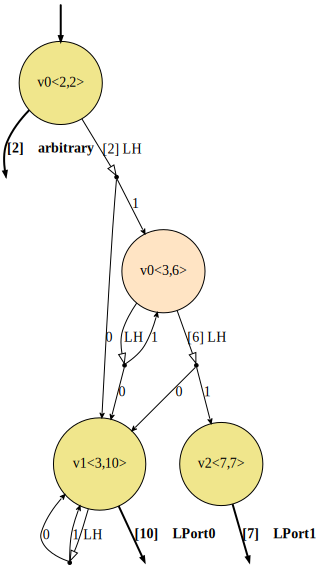

In [2]:
abdd_1: ABDD = import_abdd_from_abdd_file("../tests/apply/materialization-inputs/materialization-lport-13-7.dd")
abdd_2: ABDD = import_abdd_from_abdd_file("../tests/apply/materialization-inputs/materialization-hport-4-7.dd")
vars1 = [i.var for i in abdd_1.root.low if i.var != 0]
vars2 = [i.var for i in abdd_2.root.low if i.var != 0]
abdd_1.root.low[0].var = 10
direction = False  # false = low, true = high
# create_alpha_intersectoid(abdd_1.root, abdd_2.root, direction)
# print(abdd_1.root)
# for i in abdd_1.root.low:
#     print(i)
mat_level = 2
res = create_materialized_box_wrapper(abdd_1.root, direction, mat_level, abdd_1.variable_count + 1)
convert_to_dot(res)


In [3]:
print(abdd_1)
print(res)
abdd_subsection_create_wrapper(abdd_1, abdd_1.root, direction, res)
print(res.get_shortest_state_paths_dict())

  [ABDD]: 'lport-13-7'
  > Root = 3
  > Vars = 15
  > nodeID   varID    leaf     lowNode  lowBox   highNode highBox 
  -----------------------------------------------------------------
  > 3        1        -        4, 5     LPort    <1>      X       
  > 4        10       -        <1>      X        <0>      X       
  > 5        7        -        <0>      X        <1>      X       

  [TreeAut]: 'materialized(boxLPort, in:1, at:2, out:[10, 7], leaf:16)'
  > Root States = ['v0<2,2>']
  > source   -- edge               --> child 1   child 2     key
  --------------------------------------------------------------
  > v0<2,2>  -- Port_arbitrary <2>                         : k3 
  > v0<2,2>  -- LH <2>             --> v1<3,10>  v0<3,6>   : k6 
  > v1<3,10> -- LH                 --> v1<3,10>  v1<3,10>  : k0 
  > v1<3,10> -- Port_LPort0 <10>                           : k1 
  > v0<3,6>  -- LH <6>             --> v1<3,10>  v2<7,7>   : k2 
  > v0<3,6>  -- LH                 --> v1<3,10>  v0<3,6>

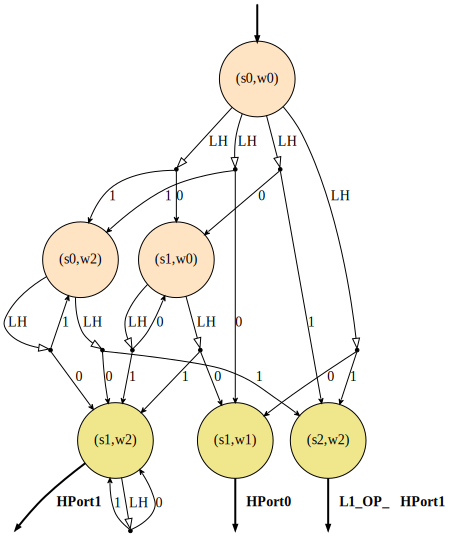

In [6]:
from apply.apply_testing import BooleanOperation, apply_intersectoid_create
from apply.box_trees import build_box_tree
from helpers.utils import box_catalogue


res = apply_intersectoid_create(BooleanOperation.AND, box_catalogue["L1"], box_catalogue["HPort"])
# tree = build_box_tree(res)
# print(tree)
convert_to_dot(res)